# pyiron

https://github.com/BAMresearch/NFDI4IngScientificWorkflowRequirements

## Define workflow with pyiron_workflow

In [1]:
import os

In [2]:
from workflow import (
    generate_mesh as _generate_mesh, 
    convert_to_xdmf as _convert_to_xdmf,
    poisson as _poisson,
    plot_over_line as _plot_over_line,
    substitute_macros as _substitute_macros,
    compile_paper as _compile_paper,
)

In [3]:
from pyiron_workflow import Workflow, to_function_node

from python_workflow_definition.pyiron_workflow import write_workflow_json

In [4]:
generate_mesh = to_function_node("generate_mesh", _generate_mesh, "generate_mesh")
convert_to_xdmf = to_function_node("convert_to_xdmf", _convert_to_xdmf, "convert_to_xdmf")
poisson = to_function_node("poisson", _poisson, "poisson")
plot_over_line = to_function_node("plot_over_line", _plot_over_line, "plot_over_line")
substitute_macros = to_function_node("substitute_macros", _substitute_macros, "substitute_macros")
compile_paper = to_function_node("compile_paper", _compile_paper, "compile_paper")

In [5]:
wf = Workflow("my_workflow")

In [6]:
wf.domain_size = 2.0

In [7]:
wf.source_directory = os.path.abspath(os.path.join(os.curdir, "source"))

In [8]:
wf.gmsh_output_file = generate_mesh(
    domain_size=wf.domain_size,
    source_directory=wf.source_directory,
)

In [9]:
wf.meshio_output_dict = convert_to_xdmf(
    gmsh_output_file=wf.gmsh_output_file,
)

In [10]:
wf.poisson_dict = poisson(
    meshio_output_xdmf=wf.meshio_output_dict["xdmf_file"], 
    meshio_output_h5=wf.meshio_output_dict["h5_file"],
    source_directory=wf.source_directory,
)

In [11]:
wf.pvbatch_output_file = plot_over_line(
    poisson_output_pvd_file=wf.poisson_dict["pvd_file"], 
    poisson_output_vtu_file=wf.poisson_dict["vtu_file"],
    source_directory=wf.source_directory,
)

In [12]:
wf.macros_tex_file = substitute_macros( 
    pvbatch_output_file=wf.pvbatch_output_file, 
    ndofs=wf.poisson_dict["numdofs"], 
    domain_size=wf.domain_size,
    source_directory=wf.source_directory,
)

In [13]:
wf.paper_output = compile_paper(
    macros_tex=wf.macros_tex_file, 
    plot_file=wf.pvbatch_output_file,
    source_directory=wf.source_directory,
)

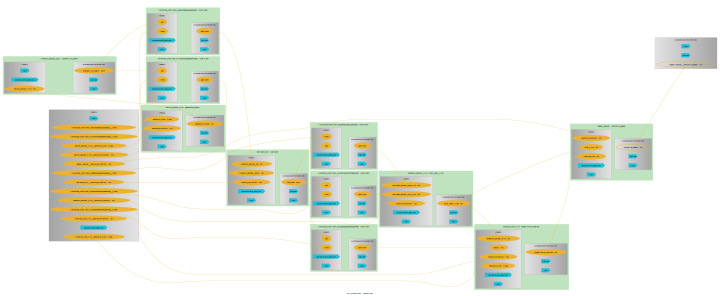

In [14]:
wf.draw(size=(10,10))

In [15]:
workflow_json_filename = "pyiron_workflow_nfdi.json"

In [16]:
write_workflow_json(graph_as_dict=wf.graph_as_dict, file_name=workflow_json_filename)

## Load Workflow with aiida

In [17]:
from aiida import load_profile

load_profile()

Profile<uuid='ab8c861a0e7f44b8b54d6acebc44dff5' name='pwd'>

In [18]:
from python_workflow_definition.aiida import load_workflow_json

In [19]:
wg = load_workflow_json(file_name=workflow_json_filename)
wg

NodeGraphWidget(settings={'minimap': True}, style={'width': '90%', 'height': '600px'}, value={'name': 'WorkGra…

In [20]:
wg.run()

05/24/2025 09:30:18 AM <282> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [3|WorkGraphEngine|continue_workgraph]: tasks ready to run: generate_mesh1
05/24/2025 09:30:20 AM <282> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [3|WorkGraphEngine|update_task_state]: Task: generate_mesh1, type: PyFunction, finished.
05/24/2025 09:30:20 AM <282> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [3|WorkGraphEngine|continue_workgraph]: tasks ready to run: convert_to_xdmf2
05/24/2025 09:30:22 AM <282> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [3|WorkGraphEngine|update_task_state]: Task: convert_to_xdmf2, type: PyFunction, finished.
05/24/2025 09:30:22 AM <282> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [3|WorkGraphEngine|continue_workgraph]: tasks ready to run: poisson3
05/24/2025 09:30:30 AM <282> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [3|WorkGraphEngine|upda

## Load Workflow with jobflow

In [21]:
from python_workflow_definition.jobflow import load_workflow_json

In [22]:
from jobflow.managers.local import run_locally

In [23]:
flow = load_workflow_json(file_name=workflow_json_filename)

In [24]:
result = run_locally(flow)
result

2025-05-24 09:31:15,165 INFO Started executing jobs locally
2025-05-24 09:31:15,364 INFO Starting job - generate_mesh (4cc4e3d9-39aa-4c20-a047-a029b6812d61)
2025-05-24 09:31:16,480 INFO Finished job - generate_mesh (4cc4e3d9-39aa-4c20-a047-a029b6812d61)
2025-05-24 09:31:16,481 INFO Starting job - convert_to_xdmf (8527c563-c0b1-4ae5-a6c3-00ae25ad2508)
2025-05-24 09:31:17,834 INFO Finished job - convert_to_xdmf (8527c563-c0b1-4ae5-a6c3-00ae25ad2508)
2025-05-24 09:31:17,836 INFO Starting job - poisson (58b31d24-51f9-4b9a-ac3e-88a7f01a09ad)
2025-05-24 09:31:20,318 INFO Finished job - poisson (58b31d24-51f9-4b9a-ac3e-88a7f01a09ad)
2025-05-24 09:31:20,318 INFO Starting job - plot_over_line (b095dc38-f858-4c34-876c-df8f8b851a5f)
2025-05-24 09:31:21,717 INFO Finished job - plot_over_line (b095dc38-f858-4c34-876c-df8f8b851a5f)
2025-05-24 09:31:21,718 INFO Starting job - substitute_macros (656e820d-20d5-4665-bb8a-43807ed6b2e9)
2025-05-24 09:31:22,542 INFO Finished job - substitute_macros (656e82

{'4cc4e3d9-39aa-4c20-a047-a029b6812d61': {1: Response(output='/home/jovyan/example_workflows/nfdi/preprocessing/square.msh', detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/jovyan/example_workflows/nfdi'))},
 '8527c563-c0b1-4ae5-a6c3-00ae25ad2508': {1: Response(output={'xdmf_file': '/home/jovyan/example_workflows/nfdi/preprocessing/square.xdmf', 'h5_file': '/home/jovyan/example_workflows/nfdi/preprocessing/square.h5'}, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/jovyan/example_workflows/nfdi'))},
 '58b31d24-51f9-4b9a-ac3e-88a7f01a09ad': {1: Response(output={'numdofs': 357, 'pvd_file': '/home/jovyan/example_workflows/nfdi/processing/poisson.pvd', 'vtu_file': '/home/jovyan/example_workflows/nfdi/processing/poisson000000.vtu'}, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_

## Load Workflow with pyiron_base

In [25]:
from python_workflow_definition.pyiron_base import load_workflow_json

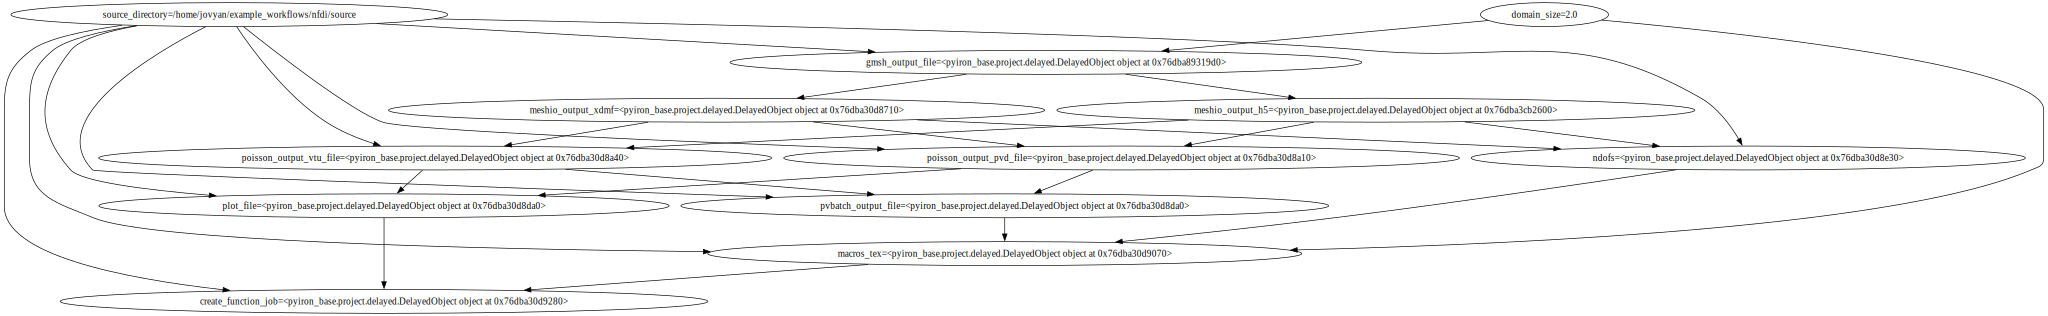

In [26]:
delayed_object_lst = load_workflow_json(file_name=workflow_json_filename)
delayed_object_lst[-1].draw()

In [27]:
delayed_object_lst[-1].pull()

The job generate_mesh_47725c16637f799ac042e47468005db3 was saved and received the ID: 1
The job convert_to_xdmf_d6a46eb9a4ec352aa996e783ec3c785f was saved and received the ID: 2
The job poisson_3c147fc86db87cf0c0f94bda333f8cd8 was saved and received the ID: 3
The job plot_over_line_ef50933291910dadcc8311924971e127 was saved and received the ID: 4
The job substitute_macros_63766eafd6b1980c7832dd8c9a97c96e was saved and received the ID: 5
The job compile_paper_128d1d58374953c00e95b8de62cbb10b was saved and received the ID: 6


'/home/jovyan/example_workflows/nfdi/postprocessing/paper.pdf'